Import Libraries &  Load Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats, linalg
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [3]:
import os
os.getcwd()
os.chdir(r'C:\Users\godwi\Desktop\all things mining')

In [4]:
df = pd.read_csv('kc_house_data.csv')

After successfully loading your dataset, you can view what your data looks like and also check key statistics with the head and describe functions respectively as shown below;

In [5]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Visualization

In terms of number of bedrooms, which houses are most commonly built?

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

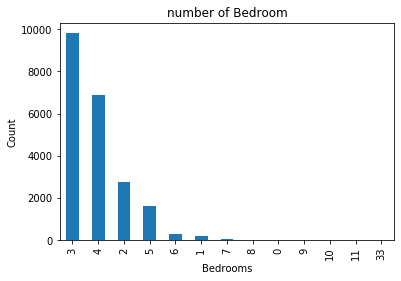

In [7]:
df['bedrooms'].value_counts().plot(kind='bar')
plt.title('number of Bedroom')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
sns.despine

Visualize common location of houses based on longitude and latitude

<Figure size 720x720 with 0 Axes>

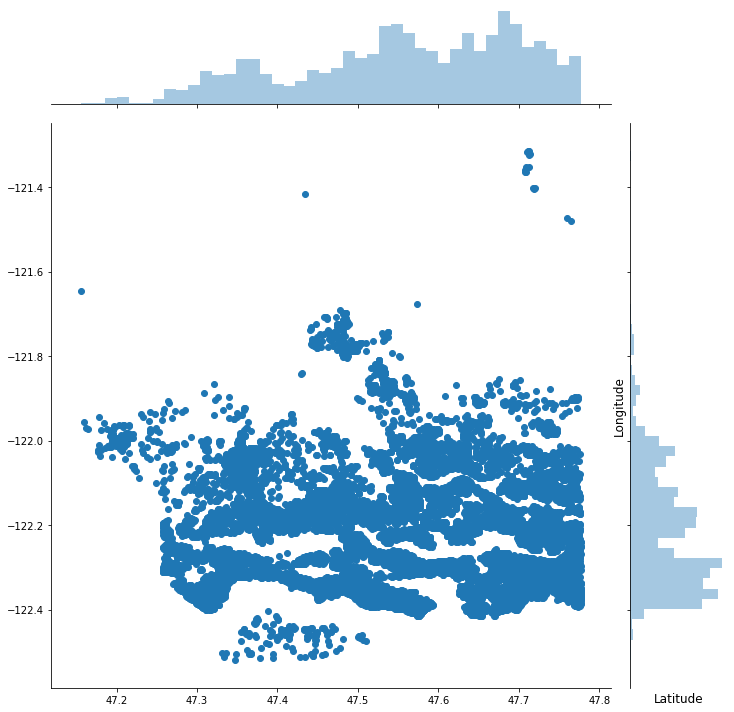

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [8]:
plt.figure(figsize=(10,10))
sns.jointplot(x=df.lat.values, y=df.long.values, height=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()
#plt1 = plt()
sns.despine

The next code analyses how square feet living is closely related to and how it influences price. 

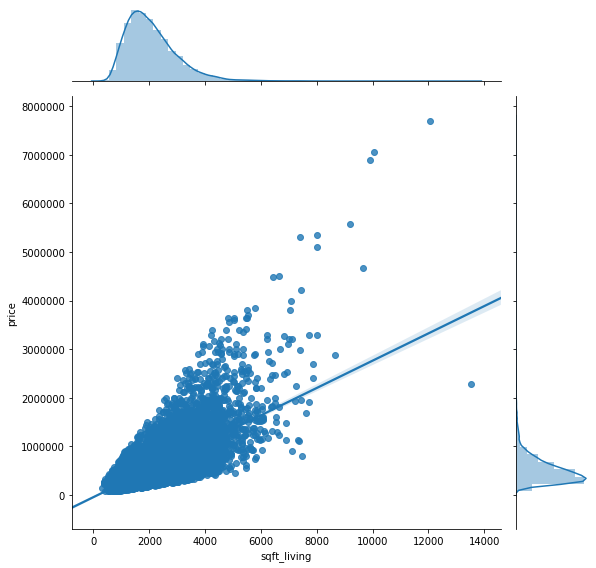

In [9]:
sns.jointplot(x="sqft_living", y="price", data=df, kind = 'reg', height = 8)
plt.show()

Apparently, a strong positive relationship exists between the variables (sqft_living vs price). This explains that sqft_living should be a good predicator of house price. Let's take a look how the rest of the variables influence price;

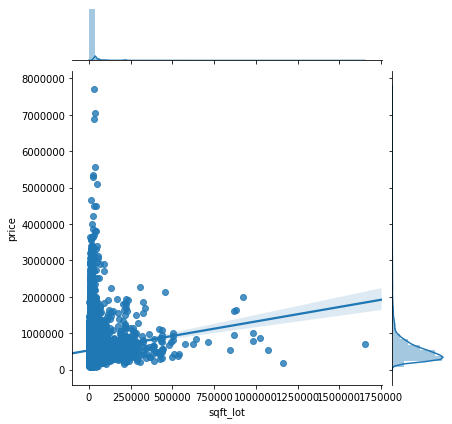

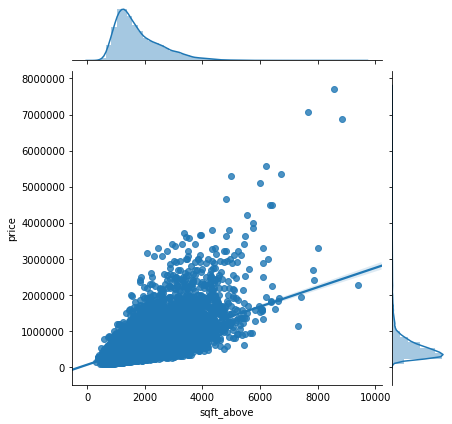

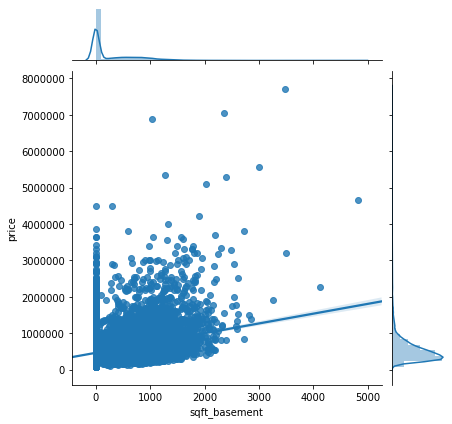

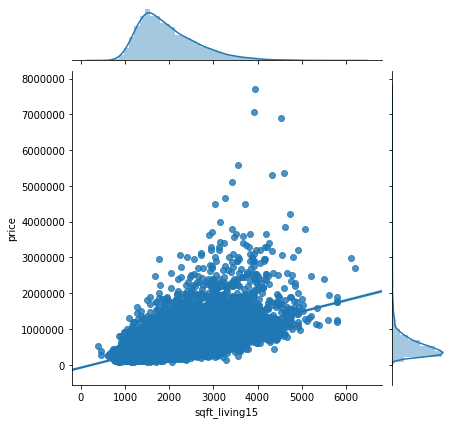

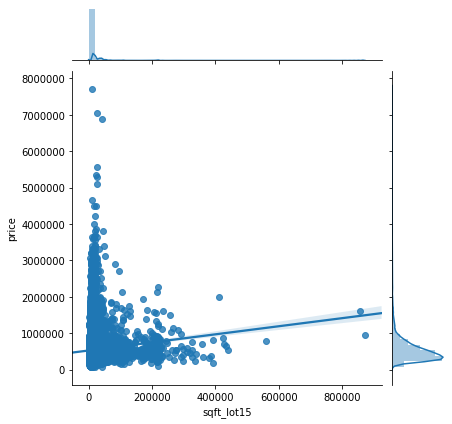

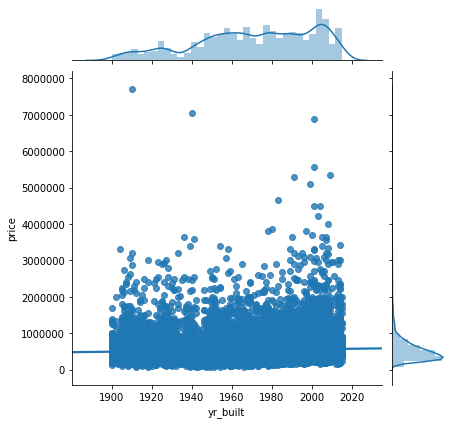

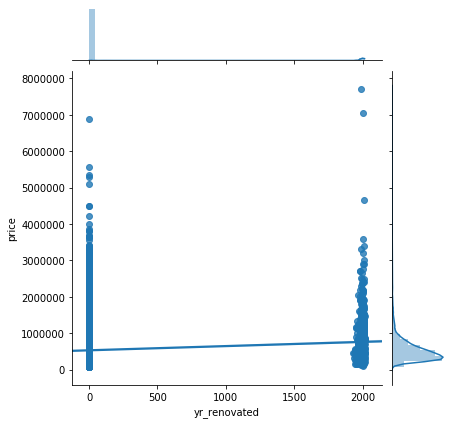

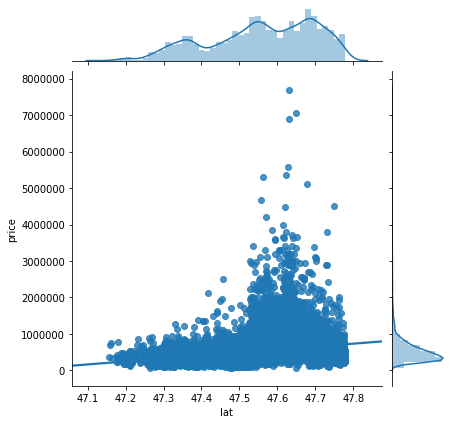

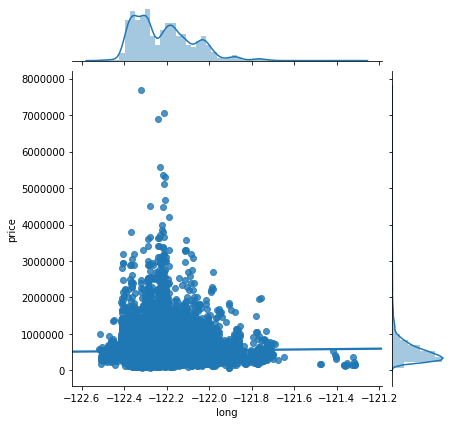

In [10]:
sns.jointplot(x="sqft_lot", y="price", data=df, kind = 'reg', height = 6)
sns.jointplot(x="sqft_above", y="price", data=df, kind = 'reg', height = 6)
sns.jointplot(x="sqft_basement", y="price", data=df, kind = 'reg', height = 6)
sns.jointplot(x="sqft_living15", y="price", data=df, kind = 'reg', height = 6)
sns.jointplot(x="sqft_lot15", y="price", data=df, kind = 'reg', height = 6)
sns.jointplot(x="yr_built", y="price", data=df, kind = 'reg', height = 6)
sns.jointplot(x="yr_renovated", y="price", data=df, kind = 'reg', height = 6)
sns.jointplot(x="lat", y="price", data=df, kind = 'reg', height = 6)
sns.jointplot(x="long", y="price", data=df, kind = 'reg', height = 6)
plt.show()

Notice that sqft_lot, sqft_lot15 and yr_built show a poor relationship to price. We can see that there is a lot of houses on the zero mark in the sqft_basement distribution. These indicate houses without a basement. In Similarly fashion, there is a lot of zeros in the yr_renovated variable, showing that the particular has never been renovated.

From the above graphs plotted, it becomes clear that many factors play a vital role in affecting the prices of the house. For instance, the square feet and location which respectively increase the price of the house.

LINEAR REGRESSION

In [15]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
labels = df['price']
trans_date = [1 if values == 2014 else 0 for values in df.date ]
df['date'] = trans_date
train1 = df.drop(['id', 'price'],axis=1)


In [16]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(train1 , labels , test_size = 0.10,random_state =2)
reg.fit(x_train,y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

reg.score(x_test,y_test)

0.732034276035769

After i fit the data to the model, the accuracy score for the prediction is 73%, which is a very good accuracy score for this kind of prediction. Target is to achieve at least 85%. Let us then try the Gradient boosting regression 

In [24]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 500, max_depth = 6, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')
clf.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=6,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [25]:
clf.score(x_test,y_test)

0.9213710580734257

We got an accuracy score of 92.13% which is excellent. Conclusively,  We can see that gradient boosting works pretty much for our prediction,using the same train and test data.